## Description
https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/opad/ - location of a daily data\
I chose https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/opad/ and 2001_01_o.zip data for the purpose of this task. Then I moved them to /data directory in our project.\
Colnames to the above file are available under this link: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/opad/o_d_format.txt - I downloaded this txt file as o_d_format.txt and also moved it to /data directory. - *after all not used (hardcoded)*\
Then I went under https://danepubliczne.imgw.pl/pl/datastore > Dane archiwalne > Dane meteorologiczne > kody_stacji.csv at the bottom of this page to find coordinates of our stations. I downloaded this file and put in the /data directory.\
Finally I downloaded https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/Opis.txt file to get possible name and coords changes under "Errata:" phrase.

## Imports

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Loading data

In [3]:
stations = pd.read_csv(
    "../data/kody_stacji.csv", sep=";", encoding="cp1250", index_col=0
)
stations

,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
LP.,,,,,,
1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216
2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7
3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840
4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800
5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453
...,...,...,...,...,...,...
637,250140020,SIENIAWKA,Nysa Łużycka,50 53 38,14 50 08,234
638,250160920,PIŁAWA GÓRNA,Piława,50 41 22,16 43 57,295
639,249180590,RUPTAWA,Olza,49 56 12,18 35 22,230


In [4]:
# Fixing wrong columns
# "Rzeka" column index
rzeka_index = stations.columns.get_loc("Rzeka")


# Moving columns from "Rzeka" one position right if value in "Rzeka" starts with a digit
def move_right(row):
    if str(row["Rzeka"])[0].isdigit():
        for i in range(len(row) - 1, rzeka_index, -1):
            row.iloc[i] = row.iloc[i - 1]
        row.iloc[rzeka_index] = None
    return row


stations = stations.apply(move_right, axis=1)
stations
# stations.to_csv('zmodyfikowany_plik.csv', sep=';', index=True) # to check if everything is ok

,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
LP.,,,,,,
1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216
2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7
3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840
4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800
5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453
...,...,...,...,...,...,...
637,250140020,SIENIAWKA,Nysa Łużycka,50 53 38,14 50 08,234
638,250160920,PIŁAWA GÓRNA,Piława,50 41 22,16 43 57,295
639,249180590,RUPTAWA,Olza,49 56 12,18 35 22,230


In [5]:
# Converting long, lat to geometry
# Function to convert dms to dd
def dms_to_dd(coord):
    degrees, minutes, seconds = coord.split()
    dd = float(degrees) + float(minutes) / 60 + float(seconds) / (60 * 60)
    return dd


stations["Długość geograficzna"] = stations["Długość geograficzna"].apply(dms_to_dd)
stations["Szerokość geograficzna"] = stations["Szerokość geograficzna"].apply(dms_to_dd)

# Creating column with Point geometry
geometry = [
    Point(lon, lat)
    for lon, lat in zip(
        stations["Długość geograficzna"], stations["Szerokość geograficzna"]
    )
]

# Creating GeoDataFrame
stations_gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs="EPSG:4326")

stations_gdf

,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,geometry
LP.,,,,,,,
1,250180590,RYBNIK-STODOŁY,Ruda,50.154444,18.483056,216,POINT (18.48306 50.15444)
2,254140010,DZIWNÓW,NaN,54.022222,14.731667,7,POINT (14.73167 54.02222)
3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50.330000,16.394167,840,POINT (16.39417 50.33000)
4,250160630,MIĘDZYGÓRZE,Wilczka,50.218333,16.773056,800,POINT (16.77306 50.21833)
5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50.153333,16.670833,453,POINT (16.67083 50.15333)
...,...,...,...,...,...,...,...
637,250140020,SIENIAWKA,Nysa Łużycka,50.893889,14.835556,234,POINT (14.83556 50.89389)
638,250160920,PIŁAWA GÓRNA,Piława,50.689444,16.732500,295,POINT (16.73250 50.68944)
639,249180590,RUPTAWA,Olza,49.936667,18.589444,230,POINT (18.58944 49.93667)


In [6]:
columns = [
    "Kod stacji",
    "Nazwa stacji",
    "Rok",
    "Miesiąc",
    "Dzień",
    "Suma dobowa opadów w [mm]",
    "Status pomiaru SMDB",
    "Rodzaj opadu [S/W/ ]",
    "Wysokość pokrywy śnieżnej [cm]",
    "Status pomiaru PKSN",
    "Wysokość świeżospałego śniegu [cm]",
    "Status pomiaru HSS",
    "Gatunek śniegu [kod]",
    "Status pomiaru GATS",
    "Rodzaj pokrywy śnieżnej [kod]",
    "Status pomiaru RPSN",
]

precip = pd.read_csv(
    "../data/2001_01_o.zip",
    header=None,
    names=columns,
    encoding="cp1250",
    compression={"method": "zip"},
)
precip

# Status pomiaru X == 8 --> no measurement
# Status pomiaru X == 9 --> no phenomenon

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów w [mm],Status pomiaru SMDB,Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,Wysokość świeżospałego śniegu [cm],Status pomiaru HSS,Gatunek śniegu [kod],Status pomiaru GATS,Rodzaj pokrywy śnieżnej [kod],Status pomiaru RPSN
0,249180020,WARSZOWICE,2001,1,3,5.9,NaN,W,0,8,0,8,NaN,8,NaN,8
1,249180020,WARSZOWICE,2001,1,6,0.9,NaN,W,0,8,0,8,NaN,8,NaN,8
2,249180020,WARSZOWICE,2001,1,7,5.9,NaN,W,0,8,0,8,NaN,8,NaN,8
3,249180020,WARSZOWICE,2001,1,8,24.3,NaN,W,0,8,0,8,NaN,8,NaN,8
4,249180020,WARSZOWICE,2001,1,9,1.3,NaN,W,0,8,0,8,NaN,8,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13375,254230030,STARY FOLWARK,2001,1,22,0.0,NaN,W,0,8,0,8,NaN,8,NaN,8
13376,254230030,STARY FOLWARK,2001,1,25,3.6,NaN,S,0,8,0,8,NaN,8,NaN,8
13377,254230030,STARY FOLWARK,2001,1,26,1.6,NaN,S,0,8,0,8,NaN,8,NaN,8
13378,254230030,STARY FOLWARK,2001,1,27,0.2,NaN,W,0,8,0,8,NaN,8,NaN,8


**! IMPORTANT NOTICE !**\
Jeżeli suma dobowa opadu jest bezpośrednio poprzedzona dniem/dniami z brakiem pomiaru i policzona jest wartość sumy miesięcznej opadu
 to wartość sumy dobowej jest opadem zbiorczym za dni w których opad nie był mierzony.

In [7]:
changes = pd.read_table(
    "../data/Opis.txt",
    skiprows=72,
    header=None,
    skipinitialspace=True,
    names=["Zmiany"],
)
changes  # preceding spaces are not real

,Zmiany
0,Stacja Katowice-Muchowiec do 31.12.2018 to sta...
1,Stacja Łódź-Lublinek do 31.12.2018 to stacja Łódź
2,Stacja Poznań-Ławica do 31.12.2018 to stacja P...
3,Stacja Warszawa-Okęcie do 31.12.2018 to stacja...
4,Stacja Wrocław-Strachowice do 31.12.2018 to st...
5,Stacja Elbląg-Milejewo do 31.03.2013 to stacja...
6,Stacja Resko-Smólsko do 31.12.2014 to stacja R...
7,Stacja Kołobrzeg-Dźwirzyno do 8.04.2018 to sta...
8,Oficjalna nazwa stacji Wojnowice k/Głubczyc to...
9,Oficjalna nazwa stacji Gołczowice k/Olkusz to ...


In [8]:
# Dataframe division to changes and official names (these one MAY be unuseful)
ix = changes[changes["Zmiany"].str.contains("Oficjalna")].index[0]

changes_not_ofc = changes.iloc[:ix]
changes_not_ofc

# May or may not be unused
changes_ofc = changes.iloc[ix:]
changes_ofc

,Zmiany
8,Oficjalna nazwa stacji Wojnowice k/Głubczyc to...
9,Oficjalna nazwa stacji Gołczowice k/Olkusz to ...
10,Oficjalna nazwa stacji Ciężkowice k/Katowic to...
11,Oficjalna nazwa stacji Dobra k/Koła to Dobra.
12,Oficjalna nazwa stacji Giżyn k/Gorzowa to Giżyn.
13,Oficjalna nazwa stacji Jabłonna k/Poznania to ...
14,Oficjalna nazwa stacji Brodnica k/Poznania to ...
15,Oficjalna nazwa stacji Jabłonka k/Konina to Ja...
16,Oficjalna nazwa stacji Korzeniewo k/Kwidzynia ...


In [9]:
# Transforming changes to be usable in a map() function
def create_station_dict(station_names):
    station_dict = dict()
    for station_name in station_names:
        words = station_name.split()
        # Searching for first occurance of "Stacja"
        first_station_index = words.index("Stacja")
        # Second occurance of "stacja"
        second_station_index = words.index("stacja", first_station_index + 1)
        # Filling dictionary
        station_dict[words[second_station_index + 1].rstrip(",")] = words[
            first_station_index + 1
        ].rstrip(",")
    return station_dict


changes_not_ofc_dict = create_station_dict(changes_not_ofc["Zmiany"].values)
changes_not_ofc_dict

{'Katowice': 'Katowice-Muchowiec',
 'Łódź': 'Łódź-Lublinek',
 'Poznań': 'Poznań-Ławica',
 'Warszawa': 'Warszawa-Okęcie',
 'Wrocław': 'Wrocław-Strachowice',
 'Elbląg': 'Elbląg-Milejewo',
 'Resko': 'Resko-Smólsko',
 'Kołobrzeg': 'Kołobrzeg-Dźwirzyno'}

In [10]:
# Mapping possible changes
precip["Nazwa stacji"] = (
    precip["Nazwa stacji"].map(changes_not_ofc_dict).fillna(precip["Nazwa stacji"])
)

# Data merging

In [11]:
merged_gdf = precip.merge(
    stations_gdf, how="inner", left_on="Kod stacji", right_on="ID"
)
merged_gdf

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Suma dobowa opadów w [mm],Status pomiaru SMDB,Rodzaj opadu [S/W/ ],Wysokość pokrywy śnieżnej [cm],Status pomiaru PKSN,...,Status pomiaru GATS,Rodzaj pokrywy śnieżnej [kod],Status pomiaru RPSN,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,geometry
0,249180020,WARSZOWICE,2001,1,3,5.9,NaN,W,0,8,...,8,NaN,8,249180020,WARSZOWICE,Pszczynka,49.991944,18.705556,270,POINT (18.70556 49.99194)
1,249180020,WARSZOWICE,2001,1,6,0.9,NaN,W,0,8,...,8,NaN,8,249180020,WARSZOWICE,Pszczynka,49.991944,18.705556,270,POINT (18.70556 49.99194)
2,249180020,WARSZOWICE,2001,1,7,5.9,NaN,W,0,8,...,8,NaN,8,249180020,WARSZOWICE,Pszczynka,49.991944,18.705556,270,POINT (18.70556 49.99194)
3,249180020,WARSZOWICE,2001,1,8,24.3,NaN,W,0,8,...,8,NaN,8,249180020,WARSZOWICE,Pszczynka,49.991944,18.705556,270,POINT (18.70556 49.99194)
4,249180020,WARSZOWICE,2001,1,9,1.3,NaN,W,0,8,...,8,NaN,8,249180020,WARSZOWICE,Pszczynka,49.991944,18.705556,270,POINT (18.70556 49.99194)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,254220060,BANIE MAZURSKIE,2001,1,27,0.1,NaN,S,0,8,...,8,NaN,8,254220060,BANIE MAZURSKIE,Gołdapa,54.251667,22.023056,110,POINT (22.02306 54.25167)
3548,254220060,BANIE MAZURSKIE,2001,1,28,3.0,NaN,S,0,8,...,8,NaN,8,254220060,BANIE MAZURSKIE,Gołdapa,54.251667,22.023056,110,POINT (22.02306 54.25167)
3549,254220060,BANIE MAZURSKIE,2001,1,29,0.1,NaN,S,0,8,...,8,NaN,8,254220060,BANIE MAZURSKIE,Gołdapa,54.251667,22.023056,110,POINT (22.02306 54.25167)
3550,254220060,BANIE MAZURSKIE,2001,1,30,0.1,NaN,S,0,8,...,8,NaN,8,254220060,BANIE MAZURSKIE,Gołdapa,54.251667,22.023056,110,POINT (22.02306 54.25167)


# Area clip (lubusz voivodeship)

Download geojson file from https://simplemaps.com/gis/country/pl.

In [12]:
# Reading geojson with voivodeships polygons
geojson = gpd.read_file('../data/pl.json')
geojson

,source,id,name,geometry
0,https://simplemaps.com,PLSL,Silesian,"POLYGON ((19.44887 49.60036, 19.44339 49.60178..."
1,https://simplemaps.com,PLMA,Lesser Poland,"POLYGON ((19.44887 49.60036, 19.44370 49.61196..."
2,https://simplemaps.com,PLPK,Subcarpathian,"POLYGON ((21.51442 49.41721, 21.51427 49.41755..."
3,https://simplemaps.com,PLDS,Lower Silesian,"POLYGON ((14.95065 51.39654, 14.96945 51.40350..."
4,https://simplemaps.com,PLOP,Opole,"POLYGON ((18.65564 50.99523, 18.62112 50.91834..."
5,https://simplemaps.com,PLPD,Podlachian,"POLYGON ((23.17608 52.28513, 23.16813 52.28172..."
6,https://simplemaps.com,PLWN,Warmian-Masurian,"POLYGON ((22.81134 54.39263, 22.81394 54.38500..."
7,https://simplemaps.com,PLLB,Lubusz,"POLYGON ((16.37113 51.74919, 16.32214 51.69995..."
8,https://simplemaps.com,PLZP,West Pomeranian,"POLYGON ((16.03854 53.00674, 16.05673 53.05426..."
9,https://simplemaps.com,PLLU,Lublin,"POLYGON ((23.65868 50.32700, 23.65812 50.32721..."


In [25]:
# Selecting Lubusz voivodeship
voi =  "Lubusz"
lb_polygon = geojson[geojson['name'] == voi]['geometry']
lb_polygon

7    POLYGON ((16.37113 51.74919, 16.32214 51.69995...
Name: geometry, dtype: geometry

In [26]:
# Clipping geodataframe to Lubusz voivodeship area
gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')
lb_gdf = gdf[gdf.within(lb_polygon.geometry.iloc[0])]

# Printing unique stations
lb_gdf['Nazwa stacji'].unique()

array(['ŻAGAŃ', 'BOCZÓW', 'DREZDENKO'], dtype=object)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13976\3676048257.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # map


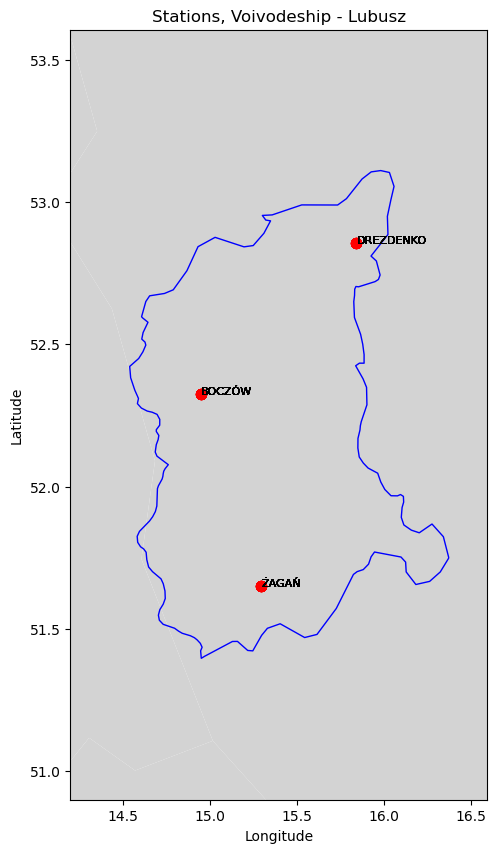

In [28]:
# Stations visualization 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # map
ax = world.plot(figsize=(10, 10), color='lightgrey')

lb_polygon.plot(ax=ax, color='none', edgecolor='blue', label=voi) # voivodeship contours
lb_gdf.plot(ax=ax, color='red', markersize=50) # stations

for x, y, label in zip(lb_gdf.geometry.x, lb_gdf.geometry.y, lb_gdf['Nazwa stacji']):
    ax.text(x, y, label, fontsize=8, ha='left') # names of the cities where the stations are

# lims
ax.set_xlim([min(lb_gdf.geometry.x) - 0.75, max(lb_gdf.geometry.x) + 0.75])
ax.set_ylim([min(lb_gdf.geometry.y) - 0.75, max(lb_gdf.geometry.y) + 0.75])

plt.title(f'Stations, Voivodeship - {voi}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
